# Overfitting

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd
from jax import lax
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import numpy as onp

import utils
import metrics
import time
import plot
from svgd import SVGD

rkey = random.PRNGKey(0)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
dist = metrics.Gaussian(0, 1)
dist = metrics.GaussianMixture([-2, 2], [1, 1], [1/3, 2/3])
n = 300
d = dist.d

n_steps = 200
svgd = SVGD(dist, n_steps, particle_shape=(n, d))

In [3]:
h = 1
lr = 1
svgd_stepsize = 0.01
bandwidth = h
ksd_bandwidth = 1

### train

In [4]:
st = time.time()
x_two, x_svgd, log_two, log_svgd, _ = svgd.train(rkey, h, lr, svgd_stepsize, n_steps, ksd_bandwidth, update_after=10**4)
x_two.block_until_ready()
end = time.time()
print(f"took {end - st} seconds")

took 8.647193670272827 seconds


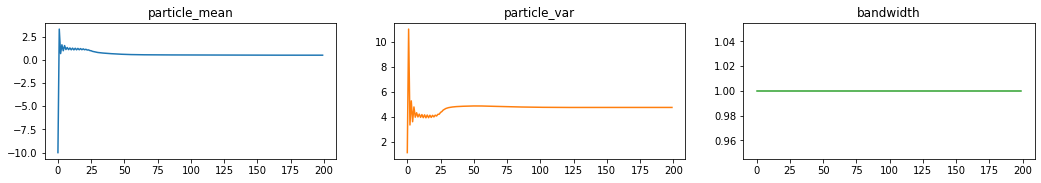

In [5]:
plot.svgd_log(log_svgd)

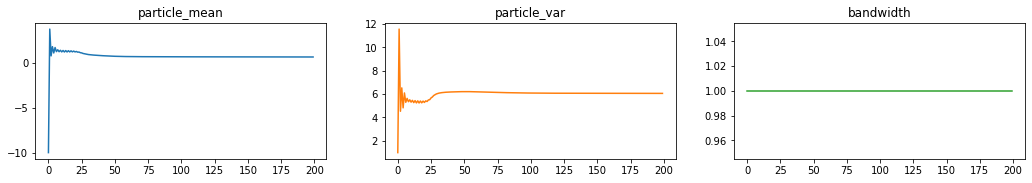

In [6]:
plot.svgd_log(log_two)

## Histograms

### Particles used to compute SVGD steps

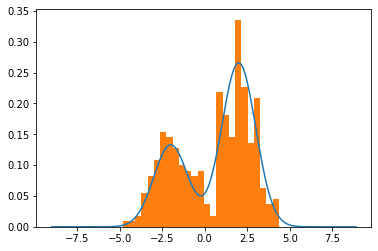

In [7]:
grid = np.arange(-9, 9, 0.1)

_ = plt.plot(grid, vmap(dist.pdf)(grid))
_ = plt.hist(x_svgd[:, 0], density=True, bins=25)

## track two

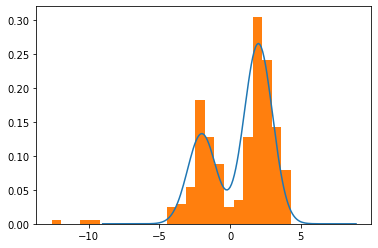

In [8]:
grid = np.arange(-9, 9, 0.1)

_ = plt.plot(grid, vmap(dist.pdf)(grid))
_ = plt.hist(x_two[:, 0], density=True, bins=25)

# compare sample

In [9]:
s = dist.sample(shape=(n,))

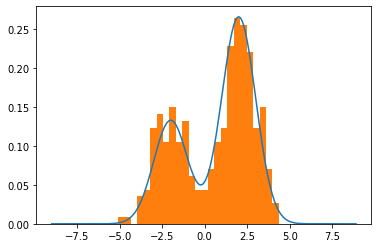

In [10]:
_ = plt.plot(grid, vmap(dist.pdf)(grid))
_ = plt.hist(s, density=True, bins=25)

In [11]:
s = s[:, np.newaxis]

In [12]:
dist.compute_metrics(s)

{'square_errors': DeviceArray([[0.00854595],
              [0.1077931 ],
              [0.00360382],
              [0.00251488]], dtype=float32),
 'ksds': DeviceArray([74.29311  ,  1.5535135,  0.5602616], dtype=float32)}

In [13]:
dist.compute_metrics(x_svgd)

{'square_errors': DeviceArray([[3.1124881e-02],
              [2.5424169e-04],
              [1.3137683e-08],
              [2.4977352e-03]], dtype=float32),
 'ksds': DeviceArray([2.4735233e+02, 6.7557446e-03, 1.0128659e-03], dtype=float32)}